## Final Project Submission

Please fill out:
* Student name: Eric An
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL: TBD

# Business Understanding

This notebook will examine the King County House Sales dataset and come up with a model using multivariate linear regression to predict the sale price of houses as accurately as possible, while also examining what factors most influence the average sale price of a home. The experiment is to determine if there are certain factors that can be taken advantage of to maximize a resident's profit when selling their home.

# Data Preparation

### Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Preprocessing

In [2]:
df = pd.read_csv('kc_house_data.csv')

#### dataset exploration

In [3]:
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

> **Observations:** We see the feature `sqft_basement` classified as an `object`, when it should be a integer value. From the category mapping file, we also recognize several features that should be classified as `category` or `object` (ie. `view`, `waterfront`, `grade`, `condition`, `zipcode`)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


> **Observations:** The maximum value of `bedrooms` is 33, a potentially significant outlier when 75% of the data is 4 bedrooms or less (same reasoning can be applied to `sqft_living`, `sqft_above`, `sqft_living15`, `sqft_lot15`)

In [5]:
# obtain normalized value counts for each column
for col in df.columns:
    try:
        print(col, df[col].value_counts(normalize=True))
    except:
        print(col, df[col].value_counts(normalize=True))
    print('\n')

id 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
                ...   
7812801125    0.000046
4364700875    0.000046
3021059276    0.000046
880000205     0.000046
1777500160    0.000046
Name: id, Length: 21420, dtype: float64


date 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
               ...   
8/3/2014     0.000046
1/10/2015    0.000046
1/17/2015    0.000046
3/8/2015     0.000046
8/30/2014    0.000046
Name: date, Length: 372, dtype: float64


price 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3622, dtype: float64


bedrooms 3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9  

In [6]:
# obtain unique values for each column
for col in df.columns:
    try:
        print(col, df[col].nunique())
    except:
        print(col, df[col].nunique())
    print('\n')

id 21420


date 372


price 3622


bedrooms 12


bathrooms 29


sqft_living 1034


sqft_lot 9776


floors 6


waterfront 2


view 5


condition 5


grade 11


sqft_above 942


sqft_basement 304


yr_built 116


yr_renovated 70


zipcode 70


lat 5033


long 751


sqft_living15 777


sqft_lot15 8682




> We see `sqft_basement` has a placeholder of "?" instead of NaN. We can also confirm that certain features have very little unique values, which usually points to it being categorical variable.

#### dataset cleaning

##### setting dates

In [7]:
import datetime as dt
df.date = pd.to_datetime(df['date'])
display(df.date.max())
display(df.date.min())
# convert to Gregorian ordinal value for preprocessing
df.date = df.date.map(dt.datetime.toordinal)

Timestamp('2015-05-27 00:00:00')

Timestamp('2014-05-02 00:00:00')

##### detecting and resolving null/missing/duplicate values

In [8]:
# convert '?' values in `sqft_basement` feature to 0
df.sqft_basement = df.sqft_basement.replace('?', np.nan).astype('float').fillna(0)

In [9]:
# confirm changes (0 value increased to 13280 (count) and to 0.614900 (normalized))
display(df.sqft_basement.value_counts().nlargest(n=2))
display(df.sqft_basement.value_counts(normalize=True).nlargest(n=2))

0.0      13280
600.0      217
Name: sqft_basement, dtype: int64

0.0      0.614900
600.0    0.010048
Name: sqft_basement, dtype: float64

In [10]:
# examine dataset for NaN values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

> For the `waterfront` and `view` features, we will replace the NaN values with the column mode, as these are categorical values.

> For the `yr_renovated` feature, we will replace the NaN values with '0', as we're inferring the value means the house was never renovated or the renovation date is unknown.

In [11]:
# replace NaN values in `waterfront` with mode
df.waterfront = df.waterfront.fillna(df.waterfront.mode()[0])

In [12]:
# replace NaN values in `view` with mode
df.view = df.view.fillna(df.view.mode()[0])

In [13]:
# replace NaN values in `yr_renovated` with 0
df.yr_renovated = df.yr_renovated.fillna(0)

In [14]:
# confirm NaN values are resolved
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
# check for duplicate values by unique id and date sold
df[df.duplicated(['id','date'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


##### examining outliers

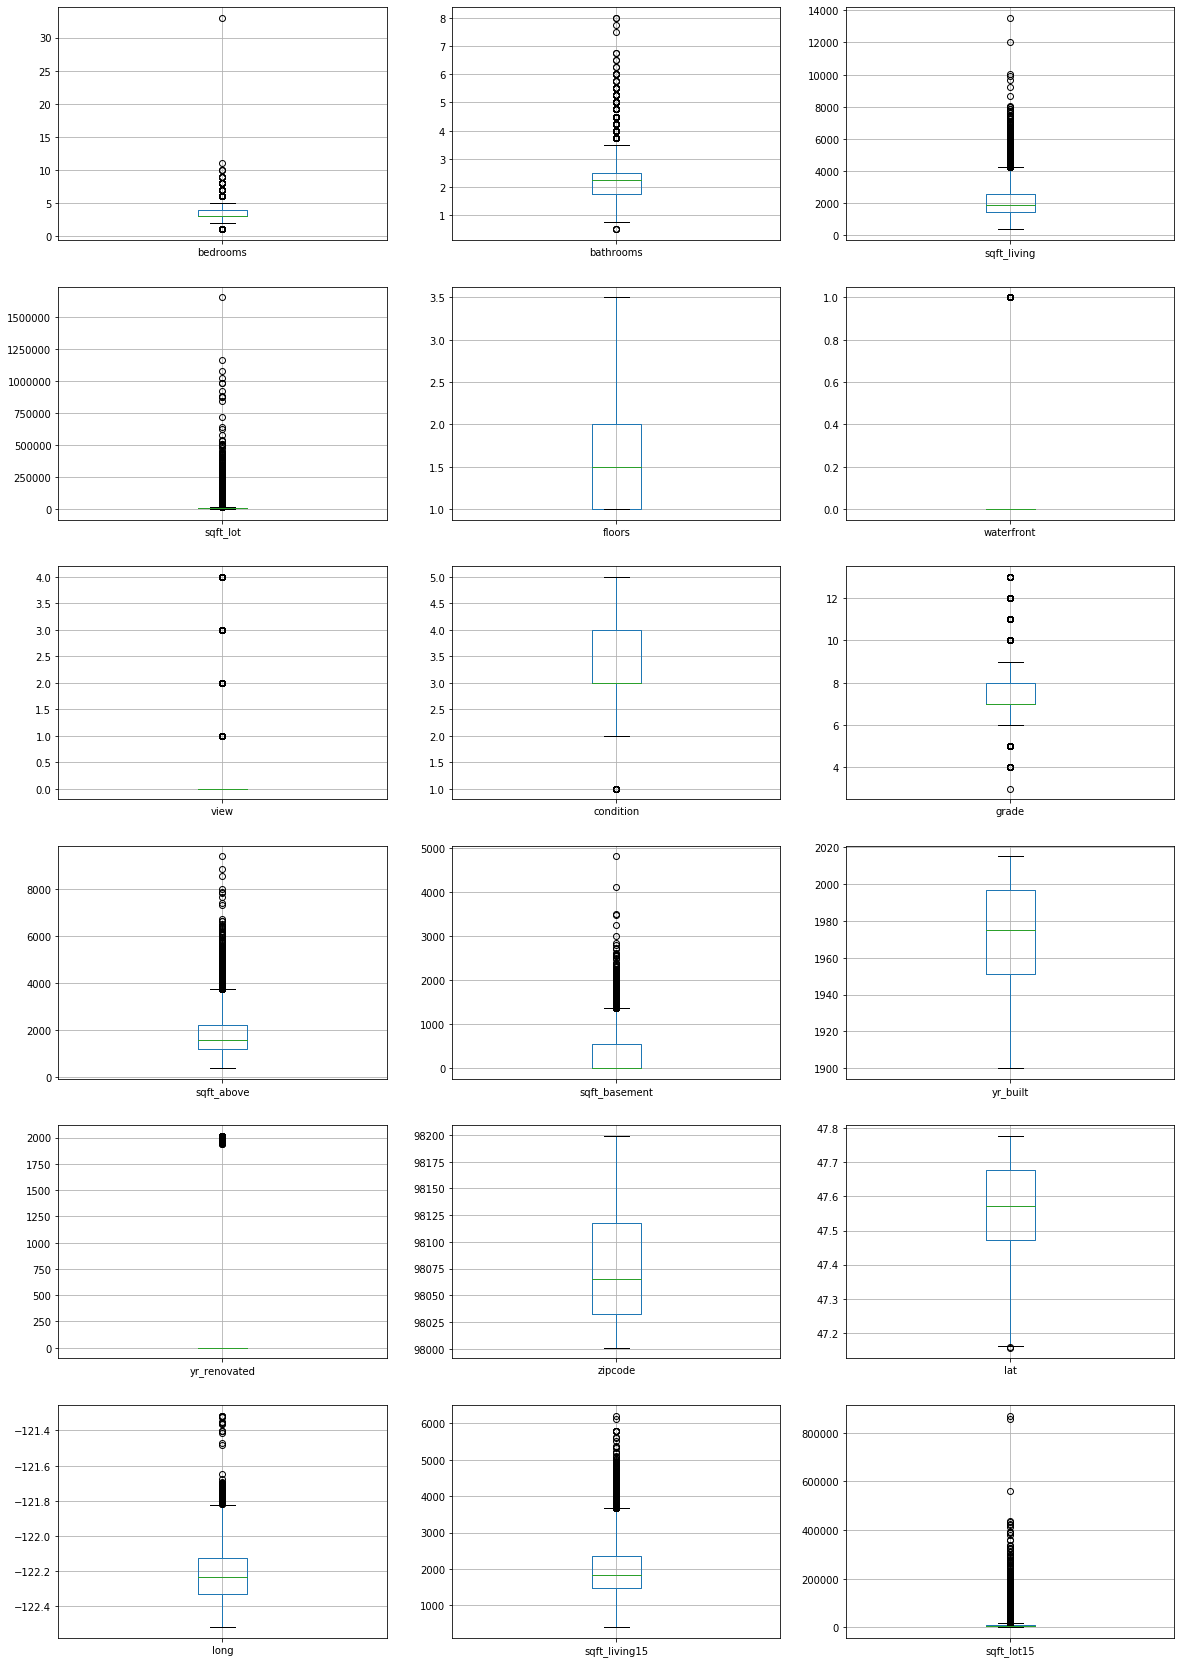

In [16]:
# create a list of column names
columns = list(df.columns)

# remove non-applicable columns
cols = [col for col in columns if col not in ('id','price', 'date')]

# create a boxplot for each feature to examine outliers
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,30))
for xcol, ax in zip(cols, axes.flatten()):
    boxplot = df.boxplot(column=xcol, ax=ax)

> There are several continuous features (`bedrooms`, `sqft_lot`, `sqft_lot15`) that have observations that are far from the spread of the rest of the data. We'll examine the outliers a little closer below.

In [17]:
df[df.bedrooms > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,735466,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15856,2402100895,735409,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [18]:
df[df.sqft_lot > 1000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,735684,700000.0,4,1.00,1300,1651359,1.0,0.0,3.0,...,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
7640,2623069031,735374,542500.0,5,3.25,3010,1074218,1.5,0.0,0.0,...,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
7762,2323089009,735617,855000.0,4,3.50,4030,1024068,2.0,0.0,0.0,...,10,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
17305,3326079016,735722,190000.0,2,1.00,710,1164794,1.0,0.0,0.0,...,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


In [19]:
df[df.sqft_lot15 > 550000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,735605,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,...,11,3605,1940.0,2003,0.0,98014,47.6760,-121.882,3420,871200
13451,3420069060,735544,790000.0,3,2.5,2640,432036,1.5,0.0,3.0,...,10,2640,0.0,1996,0.0,98022,47.1795,-122.036,1500,560617
20436,1125079111,735703,1600000.0,4,5.5,6530,871200,2.0,0.0,2.0,...,11,6530,0.0,2008,0.0,98014,47.6640,-121.878,1280,858132


> After looking at the outlier data points, we feel comfortable only removing the `bedrooms` data point with `id` of `2402100895`. This seems like an obvious miscalculation as fitting 33 bedrooms on a 6000 sq. ft. lot seems unrealistic. <br><br> We'll leave the other outliers alone for now and determine at a later point if removing these data points will affect the model's accuracy. Another option to consider is normalizing the feature to pull in the high numbers, as well. However, this would decrase the interpretability of the model. <br><br>  We don't want to unnecessarily remove outlier data just to improve accuracy, as we acknowledge outliers can and do exist in the real world.

In [20]:
# drop the aforementioned outlier from `bedrooms`
df[df.id != 2402100895]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,735519,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,735576,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,735654,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,735576,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,735374,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,735652,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,735407,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,735614,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


##### datatype misclassification

Earlier, we mentioned possible datatype classification errors in certain categories. Let's take a closer look at the joint plots - these visualizations will provide us a great initial look at the distribution of each feature as well as a simple regression line to see there is a linear relationship with the target variable, `price`.

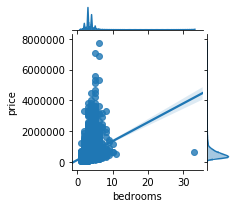

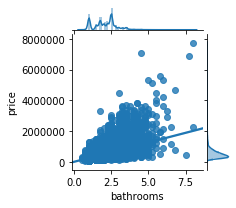

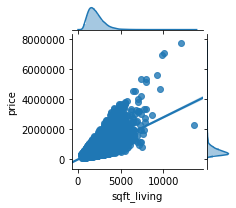

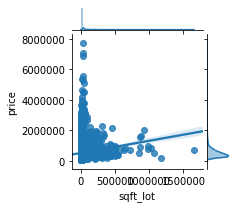

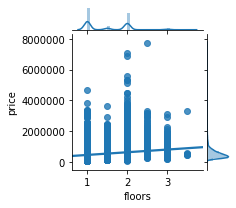

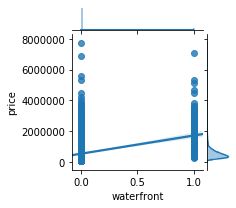

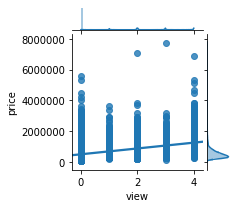

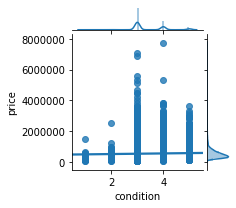

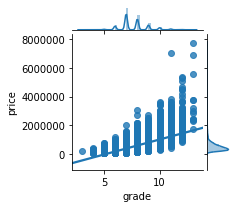

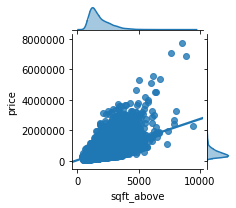

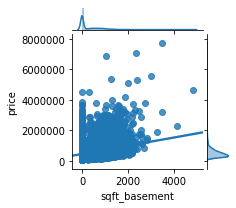

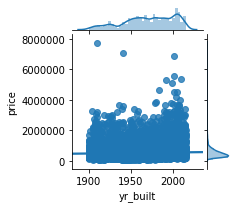

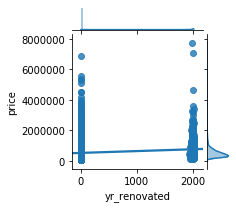

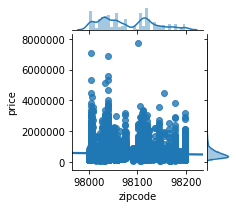

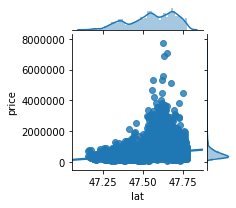

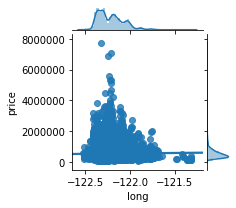

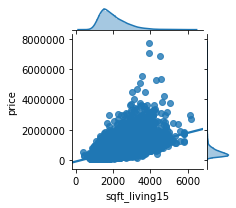

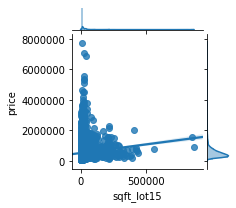

In [21]:
# use the `cols` variable defined above when we examined outliers
for col in cols:
    sns.jointplot(x= df[col], y= df['price'], data=df, kind='reg', height=3)

> A visual inspection confirms our observation earlier about the datatype misclassification of certain features that are dichotomous (`waterfront`), nominal (`zipcode`), and ordinal (`view`, `condition`, `grade`). Note that `yr_built` and `yr_renovated` could be considered categorical as well, but due to the number of values, we are treating them as continous variables in this regression.<br><br>
*reference for classifying categorical/continous variables: https://statistics.laerd.com/statistical-guides/types-of-variable.php*

In [22]:
# change relevant features to `object` dtype
cat_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']

for feat in cat_features:
        df[feat] = df[feat].astype('object')

In [23]:
# confirm datatypes have been successfully updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  int64  
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  object 
 17  lat            21597 non-null  float64
 18  long  

#### address multicollinearity

In our experiment, we want to understand the role of each independent variable, or predictor, keeping all other predictors constant (the premise of regression analysis). Therefore, we need to address multicollinearity as it violates this premise and coefficients and p-values might not be reliable for correlated predictors.

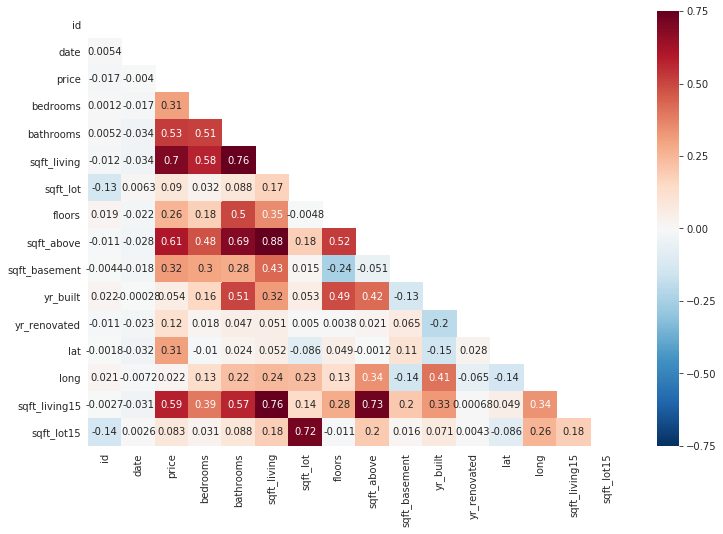

In [24]:
# create a heatmap, setting 0.75 as a threshold for determining multicollinearity
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corr, mask=mask, vmin=-0.75, vmax=0.75, annot=True, cmap="RdBu_r")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

> We see the following highly correlated features:
- `bathrooms` and `sqft_living` (0.76)
- `sqft_above` and  `sqft_living` (0.88)
- `sqft_living15` and `sqft_living` (0.76)

We'll look at each feature's relationship to the target variable, `price`, using simple linear regression to determine which to keep for our model.

In [25]:
# create a dataframe with relevant features to run a simple OLS regression for each feature
subset = ['sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15', 'price']
data = df.loc[:, subset]

results = []
for column in data.columns:
    
    # simple OLS regression model
    f = f'price~{column}'
    model = smf.ols(formula=f, data=data).fit()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    
# show results in a DataFrame
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value'])

,ind_var,r_squared,intercept,slope,p-value
0,sqft_living,0.492688,-4.398889e+04,280.863014,0.0
1,bathrooms,0.276577,8.712652e+03,251241.762495,0.0
2,sqft_above,0.366470,5.975711e+04,268.668406,0.0
3,sqft_living15,0.342507,-8.302849e+04,313.761545,0.0
4,price,1.000000,-1.496119e-10,1.000000,0.0


A good general rule is to drop the feature that isn’t as strongly correlated with the target variable. Even though these variables are significant with a 0.05 $a$ threshold, we see that `bathrooms`, `sqft_above`, and `sqft_living15` relatively capture a smaller proportion of the variation that can be attributed to the target variable of `price`.

Dropping `sqft_above` makes sense as it can represent the same space as `sqft_living`. 

`bathrooms` could be turned into a dichotomous variable (yes/no), but every property would have bathroom(s). Alternatively, if we combined it with `bedrooms` as a new feature, we would be sacrificing interpretability for accuracy, so we made a choice to drop it, as well.

We decided to drop the `sqft_living15` feature as well, rather than create a combined feature with `sqft_lot15` for the same reasons of balancing interpretability and accuracy.

In [26]:
# drop aforementioned features to create the final preprocessed dataframe
drop_cols = ['bathrooms', 'sqft_above', 'sqft_living15']
data = df.drop(drop_cols, axis=1)

### Modeling

First, let's set up our predictors and target variable.

In [27]:
# set independent and dependent variables
X = data.drop('price', axis=1)
y = data['price']

#### normalizing target value

Before taking steps to fit our model, let's take a quick look at the distribution of our target variable, `price`. 

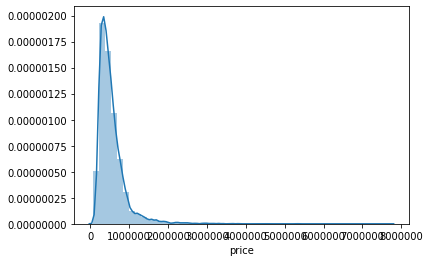

In [28]:
sns.distplot(y)

> We can see the data is heavily positively skewed and needs to be normalized. An alternative option would be trim the outliers, but that would unnecessarily cut down on our data. Slightly increasing the difficulty of the model interpretability is the easier choice in this case.

In [29]:
# normalize the target variable
log_y = np.log(y)

#### train-test-split

We'll split the data into training and test sets - using the training set to select features to train our model and the test set to test the performance of these features. Keep in mind we're using our log transformed target variable, `log_y`.

In [30]:
# set a random state for results reproducibility 
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.20, random_state=73)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


#### create baseline model

In [31]:
# fit the model to the train data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

print('r_squared:', linreg.score(X_test, y_test))
print('Train Mean Squared Error:', mean_squared_error(y_train, y_hat_train))
print('Test Mean Squared Error:', mean_squared_error(y_test, y_hat_test))

r_squared: 0.765228740877692
Train Mean Squared Error: 0.06535743268881858
Test Mean Squared Error: 0.06617200806162483


The **r_squared** score is the proportion of the variance in the target variable, `price`, that is predictable from the independent variables or features. In other words, 76.52% of the variance in `price` can be explained by the predictors in our model.

There is no correct value for **Mean Squared Error**. Simply put, the lower the value the better and 0 means the model is perfect. Since it's a relative measure against another model, we'll use this MSE calculation as a baseline.

#### k-fold cross-validation

We'll examine k-fold cross-validation for another model validation comparison.

In [32]:
# cross-validation using scikit-learn
kfold = model_selection.KFold(n_splits=10)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, log_y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 76.02%


> Given that the r_squared value is slightly lower to the train-test-split method, we'll continue using train-test-split sets for further analsis.

#### one-hot encoding (OHE)

We chose to utilize one-hot encoding (OHE) for our categorical predictors only after splitting our data into train and test sets. This ensures we don't have train-test contamination (data leakage) that might result in an overfitted model. As a result, we will have to perform OHE on the training and test sets separately.

##### training set OHE

In [33]:
# create a subset of the columns that are categorical variables
train_categoricals = [col for col in X_train if X_train[col].dtype == object]

# create dummy variables, dropping the first category to address the dummy variable trap
df_train_ohe = pd.get_dummies(X_train[train_categoricals], prefix=train_categoricals, drop_first=True)

In [34]:
# drop the original categorical columns and replace with the dummy variables
df_train_continuous = X_train.drop(train_categoricals, axis=1)

X_train_preprocessed = pd.concat([df_train_continuous, df_train_ohe], axis=1)
X_train_preprocessed

,id,date,bedrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
7847,9129100040,735470,4,3320,8587,3.0,370.0,2008,0.0,47.6910,...,0,0,0,0,0,0,0,0,0,0
13379,7137800085,735509,3,1170,9085,1.0,0.0,1967,0.0,47.2808,...,0,0,0,0,0,0,0,0,0,0
1017,1623049214,735502,4,1480,47045,1.0,0.0,1942,0.0,47.4809,...,0,0,0,0,1,0,0,0,0,0
5410,2568200170,735668,5,3220,5934,2.0,0.0,2006,0.0,47.7076,...,0,0,0,0,0,0,0,0,0,0
19971,2726059144,735698,5,4570,10194,2.0,0.0,2006,0.0,47.7180,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13704,6192400180,735512,5,3290,5600,2.0,620.0,2004,0.0,47.7056,...,0,0,0,0,0,0,0,0,0,0
16144,4137070440,735506,5,2570,7260,2.0,0.0,1996,0.0,47.2622,...,0,0,0,0,0,0,0,0,0,0
8586,6303401395,735648,2,1220,8382,1.0,0.0,1942,0.0,47.5033,...,1,0,0,0,0,0,0,0,0,0
4014,622059031,735388,4,1540,115434,1.5,0.0,1923,0.0,47.4163,...,0,0,0,0,0,0,0,0,0,0


##### test set OHE

In [35]:
# create a subset of the columns that are categorical variables
test_categoricals = [col for col in X_test if X_test[col].dtype == object]

# create dummy variables, dropping the first category to address the dummy variable trap
df_test_ohe = pd.get_dummies(X_test[test_categoricals], prefix=test_categoricals, drop_first=True)

In [36]:
# drop the original categorical columns and replace with the dummy variables
df_test_continuous = X_test.drop(test_categoricals, axis=1)

X_test_preprocessed = pd.concat([df_test_continuous, df_test_ohe], axis=1)
X_test_preprocessed

,id,date,bedrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
13856,824059042,735383,5,4180,17935,2.0,0.0,2004,0.0,47.5873,...,0,0,0,0,0,0,0,0,0,0
9135,4048400191,735389,3,1700,51649,1.5,0.0,1931,0.0,47.4704,...,0,0,0,0,0,0,0,0,0,0
13905,5683500085,735502,2,880,4558,1.0,0.0,1951,0.0,47.6803,...,0,0,0,0,0,0,0,0,0,0
20080,3262300485,735709,5,3410,8118,2.0,0.0,2006,0.0,47.6295,...,0,0,0,0,0,0,0,0,0,0
19753,6781200013,735360,3,1260,1270,2.0,220.0,2005,0.0,47.7111,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,4027700795,735675,3,1190,9000,1.0,0.0,1968,0.0,47.7700,...,0,0,0,0,0,0,0,0,0,0
16898,3278602040,735527,3,1570,2048,2.0,280.0,2006,0.0,47.5480,...,0,0,0,0,0,0,0,0,0,0
973,1778350070,735362,4,2790,10819,2.0,0.0,1996,0.0,47.5515,...,0,0,0,0,0,0,0,0,0,0
11491,9294300070,735355,4,1820,5000,1.5,180.0,1945,0.0,47.6815,...,0,0,0,0,0,0,0,0,0,0


##### reconcile missing columns

We have to reconcile the difference in number of columns of the preprocessed data as OHE was performed independently on each set of data.

In [37]:
# get missing columns in the training test
missing_cols = set(X_train_preprocessed.columns ) - set(X_test_preprocessed.columns )
# add a missing column in test set with default value equal to 0
for col in missing_cols:
    X_test_preprocessed[col] = 0
# ensure the order of column in the test set is in the same order than in train set
X_test_preprocessed = X_test_preprocessed[X_train_preprocessed.columns]

##### fit model again

Having one-hot encoded our data, let's examine the impact on our model.

In [40]:
# add a constant term
predictors_int = sm.add_constant(X_train_preprocessed)
model = sm.OLS(y_train, predictors_int).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1215.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:56:37   Log-Likelihood:                 4566.5
No. Observations:               17277   AIC:                            -8933.
Df Residuals:                   17177   BIC:                            -8157.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -201.9932     12.388    -16.

> We do see the **r_squared** value having increased from our baseline model of **0.765** to **0.875**. However, we have also increased the number of predictors from **17** to **100**. 

#### remove insignificant predictors

We'll remove some predictors that are causing noise in the model by examining the p-value significance levels of the predictors. If a coefficient's p-value is below 0.05, we can reject the null hypothesis that there is no effect on the model and continue to include it.

In [41]:
# keep predictors with p-value < 0.05
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0] # rename column names to the stats
p_table = p_table.drop(0) # drop first row
p_table = p_table.set_index(p_table.columns[0]) # set index as feature names
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('const')
print(len(p_table), len(x_cols))

101 81


> We were able to reduce the number of coefficents by **19 predictors**.

In [42]:
# create a new DataFrame with the significant features
df_significant = X_train_preprocessed[x_cols]

Just like before, we'll have to reconcile the difference in columns between this newly created dataset and the preprocessed test set.

In [43]:
# Get missing columns in the training test
missing_cols = set(df_significant.columns ) - set(X_test_preprocessed.columns )
# Add a missing column in test set with default value equal to 0
for col in missing_cols:
    X_test_preprocessed[col] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test_preprocessed = X_test_preprocessed[df_significant.columns]

In [44]:
# run linear model as before
linreg2 = LinearRegression()
linreg2.fit(df_significant, y_train)

y_hat_train = linreg2.predict(df_significant)
y_hat_test = linreg2.predict(X_test_preprocessed)

print('r_squared:', linreg2.score(X_test_preprocessed, y_test))
print('Train Mean Squared Error:', mean_squared_error(y_train, y_hat_train))
print('Test Mean Squared Error:', mean_squared_error(y_test, y_hat_test))

r_squared: 0.8676544634130477
Train Mean Squared Error: 0.03949696940939696
Test Mean Squared Error: 0.0373025639794753


> As a result of removing insignificant predictors with p-values above 0.05, our **r_squared** value has only *slightly decreased* from **0.875** to **0.868**, but we do see a **noticeable drop** in our MSE from our base line model, which is a good sign this model is more accurately predicting the variability.

We'll check the model's coeffients one more time to see if there are any more p-values greater than 0.05 using the same steps above.

In [45]:
# run OLS regression on df_significant using statsmodel
predictors_int = sm.add_constant(df_significant)
model = sm.OLS(y_train, predictors_int).fit()

# remove insignificant p-values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0] # rename column names to the stats
p_table = p_table.drop(0) # drop first row
p_table = p_table.set_index(p_table.columns[0]) # set index as feature names
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('const')
print(len(p_table), len(x_cols))

82 81


> We see that the number of predictors stayed the same, hence, there are no more predictors with p-values greater than 0.05.

In [46]:
# create the final DataFrame with the significant features
df_significant_final = X_train_preprocessed[x_cols]

### final model

In [47]:
# run OLS regression using statsmodel
predictors_int = sm.add_constant(df_significant_final)
final_model = sm.OLS(y_train, predictors_int).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1272.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:59:51   Log-Likelihood:                 3400.6
No. Observations:               17277   AIC:                            -6637.
Df Residuals:                   17195   BIC:                            -6001.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -207.5974     12.568    -16.

> Our analysis entailed performing EDA on the King County House Sales dataset to create a model that can predict the sale price of houses as accurately as possible. Our model can explain **85.7%** of the variance in the selling price of a house.

#### interpreting coefficients

We have to remember that our target variable, `price`, is in a log-transformed state, but the predictors are in the original metric. Since the scale of `price` has changed, some computation is required to accurately interpret the coefficients. Let's look at some examples:

In [65]:
# exponentiate the coefficient of zipcode_98112 (value: 0.9819)
print('percentage change of zipcode_98112:', round(((np.exp(0.9819) - 1) * 100),2))

percentage change of zipcode_98112: 166.95


> In other words, being in **zipcode 98112**, the average sale price **increases** by **166.95%**.

In [64]:
# exponentiate the coefficient of waterfront_1.0 (value: 0.4097)
print('percentage change of waterfront_1.0:', round(((np.exp(0.4097) - 1) * 100),2))

percentage change of waterfront_1.0: 50.64


> In other words, having a **waterfront** property increases the average sale price by **50.64%.**

#### comparing coefficients

As our predictors are on the same scale, we can compare the coefficients to determine which predictor has the greatest impact on the average sale price of the house.

In [82]:
# use the final model's parameters to sort the coefficients in descending order
results = pd.DataFrame(model.params, columns=['coefficient'])

# display top 10 results
print('top 10 coefficients: \n', results['coefficient'].sort_values(ascending=False)[:10])
print('-----------')
# display last 10 results
print('bottom 10 coefficients: \n', results['coefficient'].sort_values(ascending=True)[:10])

top 10 coefficients: 
 zipcode_98039    1.194438
zipcode_98004    1.057075
zipcode_98112    0.981877
zipcode_98102    0.886237
zipcode_98109    0.879212
zipcode_98119    0.859262
zipcode_98040    0.857240
zipcode_98105    0.820572
zipcode_98005    0.717550
zipcode_98199    0.707212
Name: coefficient, dtype: float64
-----------
bottom 10 coefficients: 
 const           -2.075974e+02
long            -3.612106e-01
grade_4         -2.249398e-01
grade_5         -1.651393e-01
zipcode_98032   -6.059745e-02
zipcode_98023   -2.868669e-02
floors          -1.991803e-02
sqft_basement   -1.221048e-04
sqft_lot         6.602107e-07
yr_renovated     4.686938e-05
Name: coefficient, dtype: float64


### Conclusion

We see that relative to other predictors, the property's **zipcode** has the most impact on the average sale price of the home, with properties in zipcode 98039 having the highest impact on the average sale price. This conclusion makes sense as certain tracts of land could be better positioned for higher average home values, whether it be a geographical advantage, socioeconomic effects, or neighborhood factors like school systems, community, and crime rates.

Alternatively, we see predictors like **longitude** and the **grade** assigned to the property having the lowest relative impact on the average sale price.

The conclusion is that there are no immediate, highly impactful actions to take to maximize profit when selling their home, as it isn't feasible to transplant their home into one of the zipcodes that had higher average home values, as modeled by the data.

<img src="images/Snoqualmie_Falls.jpeg" width=450>

<center><i> Snoqualmie Falls in King County</i></center>